In [2]:
%load_ext autoreload
%autoreload 2

from gnn_tracking.training.ec import ECModule
from lstcondensation.util import find_latest_checkpoint
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
log_dir = Path(
    "/home/kl5675/Documents/23/git_sync/lst-condensation-hackathon/scripts/lightning_logs/"
)

ckpt_path = find_latest_checkpoint(log_dir / "prompt-nonchalant-swift")
ec = ECModule.load_from_checkpoint(ckpt_path, map_location="cpu")

[23:36:11] DEBUG: Getting class EFMLP from module gnn_tracking.models.edge_filter
[23:36:11] DEBUG: Getting class HaughtyFocalLoss from module gnn_tracking.metrics.losses


/home/kl5675/Documents/23/git_sync/lst-condensation-hackathon/scripts/lightning_logs/prompt-nonchalant-swift/checkpoints
/home/kl5675/Documents/23/git_sync/lst-condensation-hackathon/scripts/lightning_logs/prompt-nonchalant-swift/checkpoints/epoch=195-step=117600.ckpt


In [34]:
from gnn_tracking.analysis.edge_classification import collect_all_ec_stats

In [35]:
from lstcondensation.loader import default_data_module

default_data_module.setup(stage="test")

[23:36:12] INFO: DataLoader will load 5 graphs (out of 175 available).
[23:36:12] DEBUG: First graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/lst_data_v0/processed/0170.pt, last graph is /scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/lst_data_v0/processed/0174.pt


In [39]:
import numpy as np

df = collect_all_ec_stats(
    ec,
    default_data_module.test_dataloader(),
    thresholds=np.linspace(0.0, 0.1, 8),
    max_workers=3,
)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

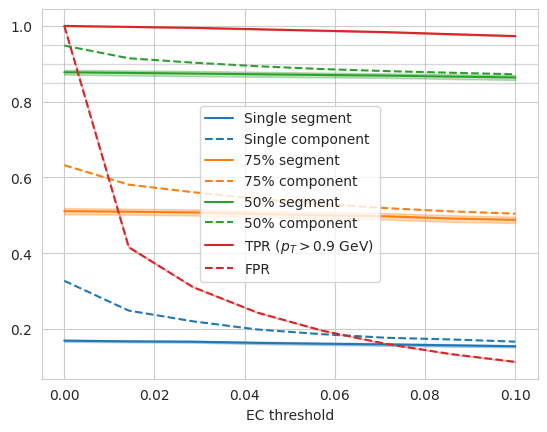

In [40]:
from gnn_tracking.analysis.edge_classification import ThresholdTrackInfoPlot

ttip = ThresholdTrackInfoPlot(df)
ttip.setup_axes()
ttip.plot_100()
ttip.plot_75()
ttip.plot_50()
ttip.plot_tpr_fpr()
ttip.plot_hlines()
# ttip.plot_mcc()
ttip.add_legend()

In [37]:
out = ec(default_data_module.datasets["test"][0])

(array([25699.,  2784.,  1986.,  1609.,  1336.,  1223.,  1124.,   977.,
         1006.,   973.,   884.,   831.,   876.,   827.,   813.,   887.,
          784.,   814.,   840.,   786.,   774.,   840.,   795.,   815.,
          864.,   827.,   832.,   855.,   880.,   904.,   913.,   935.,
          930.,   955.,   948.,  1005.,  1041.,  1029.,  1149.,  1054.,
         1129.,  1139.,  1203.,  1136.,  1135.,  1100.,  1204.,  1187.,
         1212.,  1200.,  1204.,  1287.,  1329.,  1314.,  1251.,  1268.,
         1251.,  1205.,  1265.,  1236.,  1250.,  1141.,  1169.,  1130.,
         1113.,  1108.,  1045.,   938.,   946.,   829.,   831.,   759.,
          724.,   684.,   604.,   632.,   565.,   515.,   513.,   446.,
          440.,   413.,   429.,   440.,   447.,   433.,   491.,   490.,
          570.,   585.,   595.,   658.,   755.,   843.,   958.,  1133.,
         1310.,  1206.,   842.,   129.]),
 array([-3.        , -2.97024465, -2.94048905, -2.9107337 , -2.88097835,
        -2.85122275, 

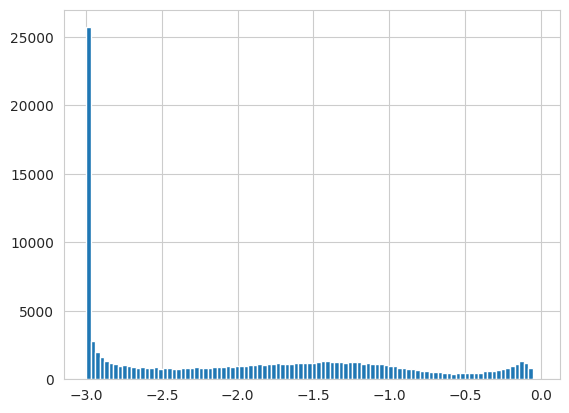

In [38]:
import torch
from matplotlib import pyplot as plt

plt.hist(torch.log10(out["W"].detach()), bins=100)